# Randomized Hilbert-Schmidt Criterion From Scratch

In [55]:
import numpy as np
import scipy.io as scio
from sklearn.utils import check_random_state
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

In [56]:
rhsic_data = scio.loadmat('/home/emmanuel/data/rhsic_data.mat')

### Step I - Data & Parameters

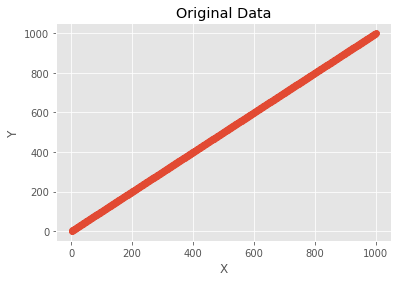

In [57]:
X = rhsic_data['x']
Y = rhsic_data['y']

n, d = X.shape
n_features = rhsic_data['D'][0][0]

fig, ax = plt.subplots()

ax.scatter(X, Y)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Original Data')
plt.show()

## MATLAB Calculation


In [64]:
factor = 1 / (n - 1)**2
factor_matlab = rhsic_data['factor'][0][0]

print(f"factor: {factor}")
print(f'factor (matlab): {factor_matlab}')

factor: 1.002003004005006e-06
factor (matlab): 1.002003004005006e-06


In [65]:
zx_matlab = rhsic_data['zx']
Wx_matlab = rhsic_data['Wx']
Zx_matlab = rhsic_data['Zx']
Zxc_matlab = rhsic_data['Zxc']

zy_matlab = rhsic_data['zy']
Wy_matlab = rhsic_data['Wy']
Zy_matlab = rhsic_data['Zy']
Zyc_matlab = rhsic_data['Zyc']
hsic_matlab = rhsic_data['hsic'][0][0]

print(f"MATLAB HSIC: {hsic_matlab}")


# np.testing.assert_array_almost_equal(Rxy, Rxy_matlab, decimal=1)


MATLAB HSIC: 0.1263408047134729


In [69]:
print(Zxc_matlab.shape, Zyc_matlab.shape)
print(Rxy_matlab.shape, Rxy.shape)

(1000, 100) (1000, 100)
(100, 100) (100, 100)


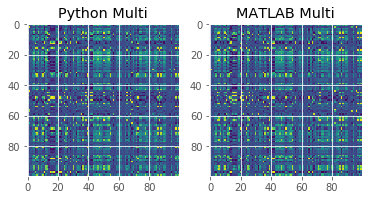

In [74]:
# Calculate RHSIC
Rxy = Zxc_matlab.T @ Zyc_matlab #Zxc_matlab.T @ Zyc_matlab
Rxy_matlab = rhsic_data['Rxy']

fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].imshow(np.real(Rxy))
ax[1].imshow(np.real(Rxy_matlab))
ax[0].set_title('Python Multi')
ax[1].set_title('MATLAB Multi')
plt.show()

In [77]:
Rxy_matlab[:2, :2]

array([[-1.09601796+5.65268504j,  0.55643093-1.44291788j],
       [-0.14915046+1.90796434j,  0.47450491-1.82363041j]])

In [81]:
np.transpose(Rxy_matlab[:2, :2])

array([[-1.09601796+5.65268504j, -0.14915046+1.90796434j],
       [ 0.55643093-1.44291788j,  0.47450491-1.82363041j]])

In [83]:
    
hsic = factor * np.real(np.trace( Rxy @ Rxy.T))
hsic_matlab = factor * np.real(np.trace( Rxy_matlab @ np.matrix.getH(Rxy_matlab)))

print(f'HSIC Py (I): {hsic}')
print(f'HSIC Matlab (I): {hsic_matlab}')

HSIC Py (I): 0.007574781979556385
HSIC Matlab (I): 0.1263408047134729


In [ ]:
# Calculate RHSIC
Zxx_matlab = Zx_matlab @ Zxc_matlab.T
Zyy_matlab = Zy_matlab @ Zyc_matlab.T
hsic_matlab = (1 / (n - 1)**2) * np.real(np.trace(Zxx_matlab * Zyy_matlab))

print(f'HSIC Matlab (II): {hsic_matlab}')

### Step II - Estimate Kernel Parameters

In [31]:
# Use matlab kernel parameters
sigma_x = rhsic_data['sigmax'][0][0]
sigma_y = rhsic_data['sigmay'][0][0]

print(f'Sigma_x: {sigma_x}')
print(f'Sigma_y: {sigma_y}')

Sigma_x: 207.88939366884497
Sigma_y: 207.88939366884497


### Generate Random normal vector

$zx \sim \mathcal{N}(0, 1) \in \mathbb{R}^{DxF}$

where:
* $D$ is the number of dimensions
* $F$ is the number of features

In [39]:
# set random generator
rng = check_random_state(1234)

n, d = X.shape
n_features = rhsic_data['D'][0][0]

# generate random samples
zx = rng.randn(d, n_features)
zx_matlab = rhsic_data['zx']

print(zx.shape, zx_matlab.shape)

(1, 100) (1, 100)


### Random Features Kernel

In [42]:
Wx = (1 / sigma_x) * zx
Wx_matlab = (1 / sigma_x) * zx_matlab
